# Stellar Clusters & Equations

* Stellar clusters are groups of stars that are gravitationally bound and formed from the same molecular cloud of gas and dust. These clusters provide valuable insights into stellar evolution, as the stars within a cluster share similar ages, compositions, and distances. With the advent of increasingly powerful supercomputers, many-body gravitational systems could be studied in unprecedented detail where earlier generations had to rely on statistical analysis.
* Stellar clusters exhibit a density profile that describes how the number density of stars changes with distance from the center of the cluster. There are two main types of stellar clusters: open clusters and globular clusters.
* Here are some key concepts and formulas related to stellar clusters:
  - **Density Profile (King Model)**: Stellar clusters exhibit a density profile that describes how the number density of stars changes with distance from the center of the cluster.

  > $\rho(r) = \frac{\rho_0}{\left[1 + \left(\frac{r}{r_c}\right)^2\right]^{3/2}}$

  where:

  $p(r)$: the number density of stars at distance $r$

  $p_0$: the central number density

  $r_c$: the core radius

  - **Luminosity Function (Power-law)**: The luminosity function describes the distribution of stellar luminosities within a cluster. It is often modeled by a power-law function.

  > $\Phi(L) \propto L^{-\alpha}$

  where:

  $\Phi(L)$: the number of stars with luminosity $L$

  $\alpha$: the power-law index

  - **Mass Function (Power-law)**: The mass function describes the distribution of stellar masses within a cluster. It is often modeled by a power-law function.

  > $\xi(m) \propto m^{-\beta}$

  where:

  $\xi(m)$: the number of stars with mass $m$

  $\beta$: the power-law index

  - **Virial Theorem**: The virial theorem is used to estimate the total mass of a stellar cluster based on its observed properties. For a virialized cluster in equilibrium, the kinetic energy ($T$) is related to the potential energy ($U$).

  > $2T + U = 0$

  The total mass ($M$) can be estimated using the observed velocity dispersion $\sigma_v$ and the size of the cluster ($R$):

  $M \approx \frac{3\sigma_v^2 R}{G}$


In [ ]:
%%capture
!pip install astroquery

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.constants import au,pc
from astroquery.vizier import Vizier
%matplotlib inline
plt.style.use("dark_background")

In [3]:
def KingDensityProfile(radius:int or float,centralNumberDensity:int or float,coreRadius:int or float)->int or float:
  result = centralNumberDensity/((1+(radius/coreRadius)**2)**(3/2))
  return result

In [19]:
def GenerateStellarPosition(numberStars:int or float,centralNumberDensity:int or float,coreRadius:int or float)->int or float:
  radialDistance = np.random.uniform(0,2*coreRadius,numberStars) # random radial distances from the center
  angles = np.random.uniform(0,2*np.pi,numberStars) # random angles for 2D positions
  densityProfileValues = KingDensityProfile(radialDistance,centralNumberDensity,coreRadius) # density profile values at radial distances
  probabiliyDistribution = densityProfileValues/np.sum(densityProfileValues)
  selectedRadialDistance = np.random.choice(radialDistance,numberStars,p=probabiliyDistribution) # Randomly select radial distances based on the density profile
  xPositions = selectedRadialDistance*np.cos(angles)
  yPositions = selectedRadialDistance*np.sin(angles)
  return xPositions,yPositions,probabiliyDistribution

In [20]:
numberStar = 1000
centralNumberDensity = 1.0 # rho initial
coreRadius = 10.0

In [21]:
xPos,yPos,probabiliyDistribution = GenerateStellarPosition(numberStar,centralNumberDensity,coreRadius)

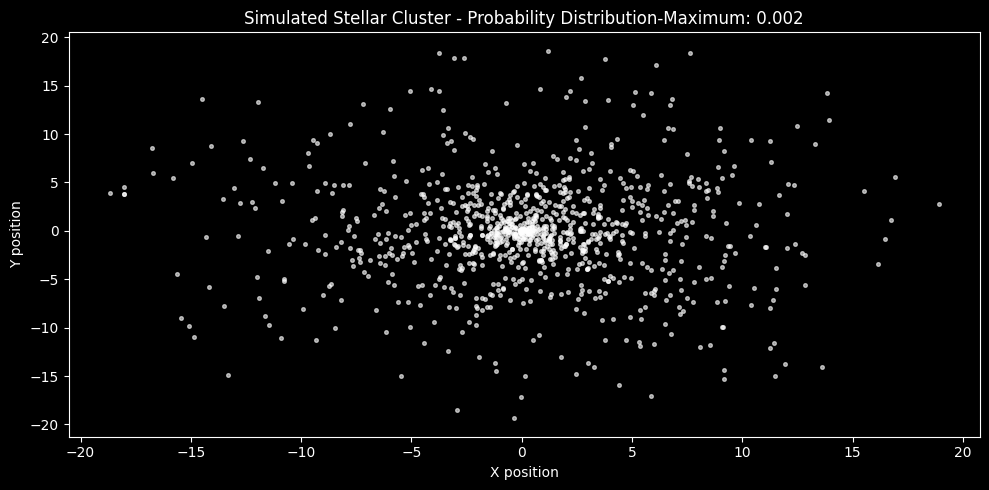

In [22]:
plt.figure(figsize=(10,5))
plt.title(f"Simulated Stellar Cluster - Probability Distribution-Maximum: {round(probabiliyDistribution.max(),3)}")
plt.scatter(xPos,yPos,s=7,color="white",alpha=0.6)
plt.xlabel("X position")
plt.ylabel("Y position")
plt.tight_layout()
plt.show()

**For Pleiades(M44) Cluster**

In [34]:
def GetClusterInformation(clusterName:str)->list or tuple:
  vizierEngine = Vizier(columns=["*","_RAJ2000","_DEJ2000"])
  result = vizierEngine.query_object(clusterName,catalog="clusters")
  if (result is not None) and (len(result) > 0):
    clusterInformation = result[4]
    return clusterInformation
  else:
    return None

In [35]:
clusterName = "M44"
clusterInformation = GetClusterInformation(clusterName)

In [36]:
clusterInformation

_RAJ2000,_DEJ2000,RAJ2000,DEJ2000,Signal
deg,deg,deg,deg,keV
float64,float64,float64,float64,float64
130.0812637034515,19.6013651641579,130.08126370345,19.60136516416,0.425973
130.0361726414275,19.5998643045780,130.03617264143,19.59986430458,5.503273
130.0788288663973,19.6052041310172,130.07882886640,19.60520413102,1.450760
130.0355298194614,19.6077678390664,130.03552981946,19.60776783907,0.469358
130.0865081826411,19.6148263670358,130.08650818264,19.61482636704,2.200963
130.0573625974147,19.6244241836932,130.05736259741,19.62442418369,2.449133
130.0266130506305,19.6307202926884,130.02661305063,19.63072029269,0.400012
130.0358997339920,19.5956347432798,130.03589973399,19.59563474328,5.361824


In [37]:
clusterRA = clusterInformation["_RAJ2000"]
clusterDE = clusterInformation["_DEJ2000"]

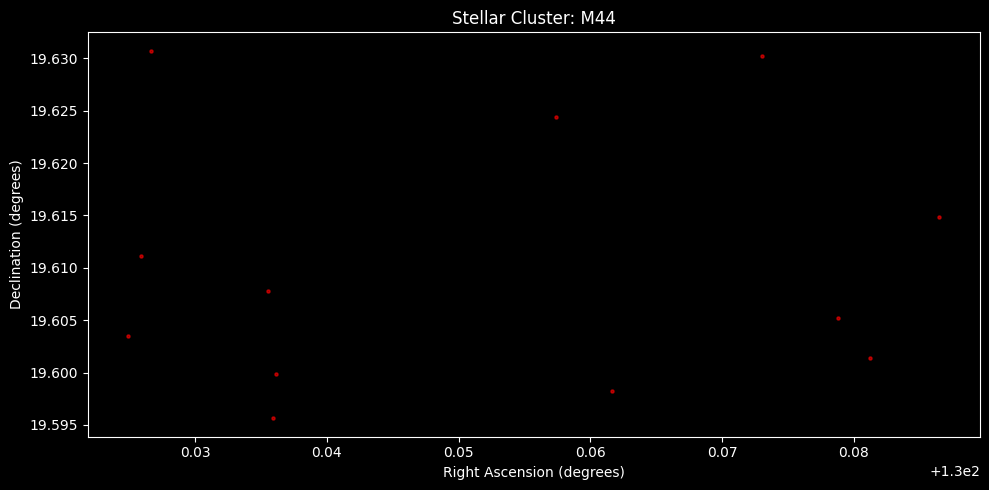

In [38]:
plt.figure(figsize=(10,5))
plt.title(f"Stellar Cluster: {clusterName}")
plt.scatter(clusterRA,clusterDE,s=5,color="red",alpha=0.6)
plt.xlabel("Right Ascension (degrees)")
plt.ylabel("Declination (degrees)")
plt.tight_layout()
plt.show()

* The most important application in astrophysics is the dynamics of dark matter halos in which galaxies, groups of galaxies, or clusters consisting of thousands of galaxies are embedded. The dark matter is treated as collisionless gas, where particles interact only via gravity. In this case, the term particle does not mean an atom or elementary particle, it just refers to an arbitrary point mass. For a total number of ($N$) particles, ~$N^2$ interactions have to be computed to determine the instantaneous accelerations of all particles directly. Since the particle positions change in time, the computation of interactions has to be carried out for a larger number of time steps.

## Example

**The evolution of the cluster was computed over a period of 100 million years and snapshots of the stellar positions and velocities were recorded every 200,000 years, resulting in 500 output files.**

In [ ]:
%%capture
from google.colab import drive
drive.mount("/content/drive")

**For real data**:

https://drive.google.com/drive/folders/15nDwFGN3innp3Dgxi_jqLwQu_qR_28vw?usp=sharing

In [42]:
dataPath = "/content/drive/MyDrive/Astronomy/Project Data/star_cluster_simulation"

In [81]:
filePathCount = 250 # the first data count in file for example, for full data it must be 501
for index in range(filePathCount):
  snapshot = np.loadtxt(f"{dataPath}/output_{str(index)}.dat",dtype="float64")
  if index == 0:
    data = np.array([snapshot])
  else:
    data = np.append(data,[snapshot],axis=0)

In [82]:
data.shape

(250, 1000, 8)

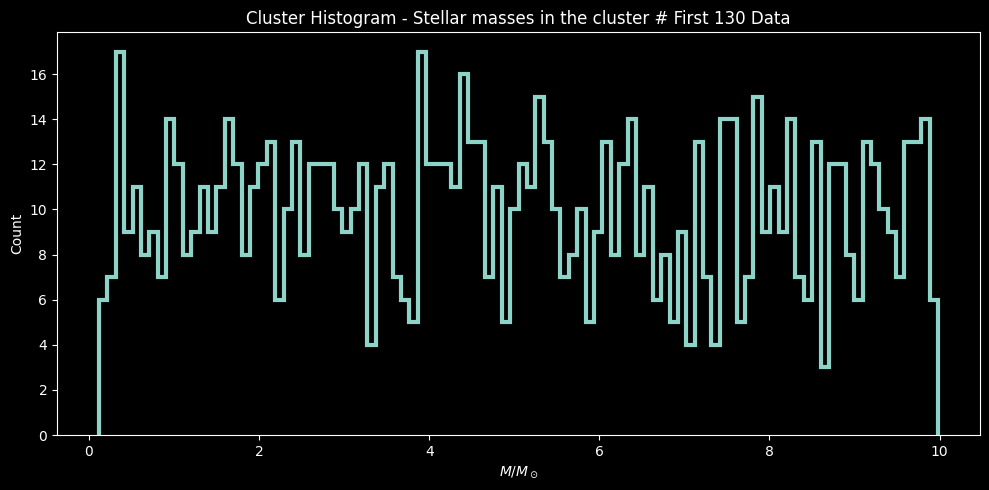

In [84]:
plt.figure(figsize=(10,5))
plt.hist(data[0,:,1],100,histtype="step",lw=3)
plt.xlabel("$M/M_\odot$")
plt.ylabel("Count")
plt.title("Cluster Histogram - Stellar masses in the cluster # First 130 Data")
plt.tight_layout()
plt.show()

In [85]:
averageMass = np.mean(data[0,:,1])
print(f"Average mass in cluster: {averageMass} (solar masses)")

Average mass in cluster: 4.984255601961191 (solar masses)


In [86]:
rDistance = np.sqrt(
    data[:,:,2]**2 + # x-coor
    data[:,:,3]**2 + # y-coor
    data[:,:,4]**2 # z-coor
)*au/pc

In [87]:
velocityMagnitude = np.sqrt(
    data[:,:,5]**2 + # velocity x-component
    data[:,:,6]**2 + # velocity y-component
    data[:,:,7]**2 # velocity <-component
)

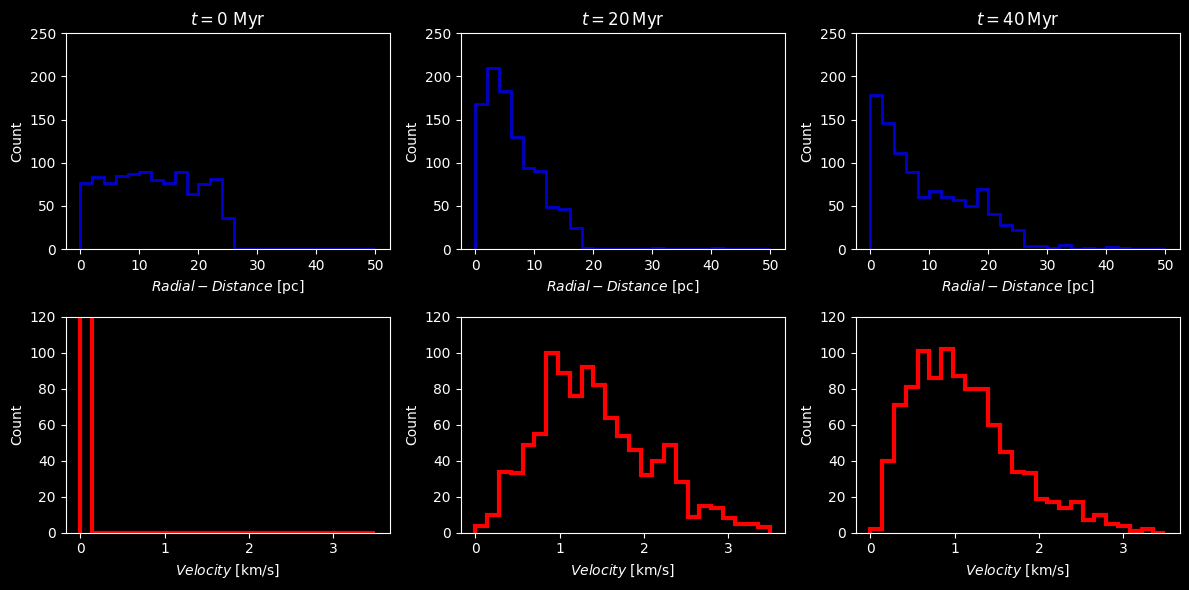

In [88]:
nBinRange = 25
plt.figure(figsize=(12,6))
plt.subplot(231)
plt.hist(rDistance[0,:],nBinRange,range=[0,50],histtype="step",lw=2,color="mediumblue")
plt.xlabel("$Radial-Distance$ [pc]")
plt.ylabel("Count")
plt.ylim(0,250)
plt.title("$t=0$ Myr")
plt.subplot(232)
plt.hist(rDistance[100,:],nBinRange,range=[0,50],histtype="step",lw=2,color="mediumblue")
plt.xlabel("$Radial-Distance$ [pc]")
plt.ylabel("Count")
plt.ylim(0,250)
plt.title("$t={:.0f}\,$Myr".format(100*0.2))
plt.subplot(233)
plt.hist(rDistance[200,:],nBinRange,range=[0,50],histtype="step",lw=2,color="mediumblue")
plt.xlabel("$Radial-Distance$ [pc]")
plt.ylabel("Count")
plt.ylim(0,250)
plt.title("$t={:.0f}\,$Myr".format(200*0.2))
plt.subplot(234)
plt.hist(velocityMagnitude[0,:],nBinRange,range=[0,3.5],histtype="step",lw=3,color="red")
plt.xlabel("$Velocity$ [km/s]")
plt.ylabel("Count")
plt.ylim(0,120)
plt.subplot(235)
plt.hist(velocityMagnitude[100,:],nBinRange,range=[0,3.5],histtype="step",lw=3,color="red")
plt.xlabel("$Velocity$ [km/s]")
plt.ylabel("Count")
plt.ylim(0,120)
plt.subplot(236)
plt.hist(velocityMagnitude[200,:],nBinRange,range=[0,3.5],histtype="step",lw=3,color="red")
plt.xlabel("$Velocity$ [km/s]")
plt.ylabel("Count")
plt.ylim(0,120)
plt.tight_layout()
plt.show()

**Since the cluster is a closed system that can neither gain nor lose energy in total, gravitational potential energy must have been transformed into kinetic energy in the process of stars concentrating near the center until an equilibrium is reached. The statement suggests that in a closed system like a star cluster, the gravitational potential energy of stars can be transformed into kinetic energy as the stars concentrate near the center, eventually reaching an equilibrium state.**

**In the context of dark matter, the virial theorem plays a role in understanding the dynamics of galaxy clusters. Dark matter is a hypothetical form of matter that does not emit, absorb, or reflect light, making it invisible and detectable only through its gravitational effects. The presence of dark matter is inferred from its gravitational influence on visible matter, such as stars and gas.**

**To examine the evolution in more detail, we compute averaged quantities for all stars at a given time. In the following, we consider root mean square (RMS) radial distances and velocities:**

In [89]:
radialDistancesRMS = np.sqrt(np.mean(rDistance**2,axis=1))
velocityRMS = np.sqrt(np.mean(velocityMagnitude**2,axis=1))

In [90]:
medianValue = np.median(rDistance,axis=1)

In [91]:
timeInterval = np.linspace(0,100,filePathCount)

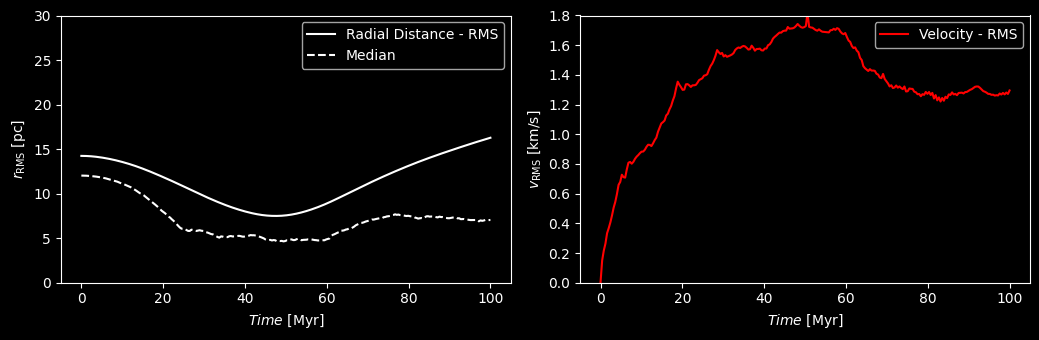

In [92]:
plt.figure(figsize=(10.5,3.5))
plt.subplot(121)
plt.plot(timeInterval,radialDistancesRMS,color="white",label="Radial Distance - RMS")
plt.plot(timeInterval,medianValue,color="white",ls="dashed",label="Median")
plt.xlabel("$Time$ [Myr]")
plt.ylabel("$r_\mathrm{RMS}$ [pc]")
plt.legend()
plt.ylim(0,30)
plt.subplot(122)
plt.plot(timeInterval,velocityRMS,color="red",label="Velocity - RMS")
plt.xlabel("$Time$ [Myr]")
plt.ylabel("$v_\mathrm{RMS}$ [km/s]")
plt.ylim(0,1.8)
plt.legend()
plt.tight_layout()
plt.show()

In [93]:
def SimulateStarCluster(darkMatterFactor:int or float)->tuple:
  xPositions = data[:,:,2] # x-coor
  yPositions = data[:,:,3] # y-coor
  gravitationalPotential = -1 / np.sqrt(xPositions**2+yPositions**2) # Calculate gravitational potential energy
  darkMatterPotential = darkMatterFactor*gravitationalPotential # Dark matter contribution (additional mass)
  totalPotential = gravitationalPotential+darkMatterPotential # Total potential energy
  kineticEnergy = -0.5*totalPotential # Kinetic energy (set to maintain virial theorem)
  return xPositions,yPositions,totalPotential,kineticEnergy

In [94]:
darkMatterFactor = 2.0 # means that the mass attributed to dark matter is twice the mass of the visible matter

In [95]:
xPos,yPos,potentialTotal,ke = SimulateStarCluster(darkMatterFactor)

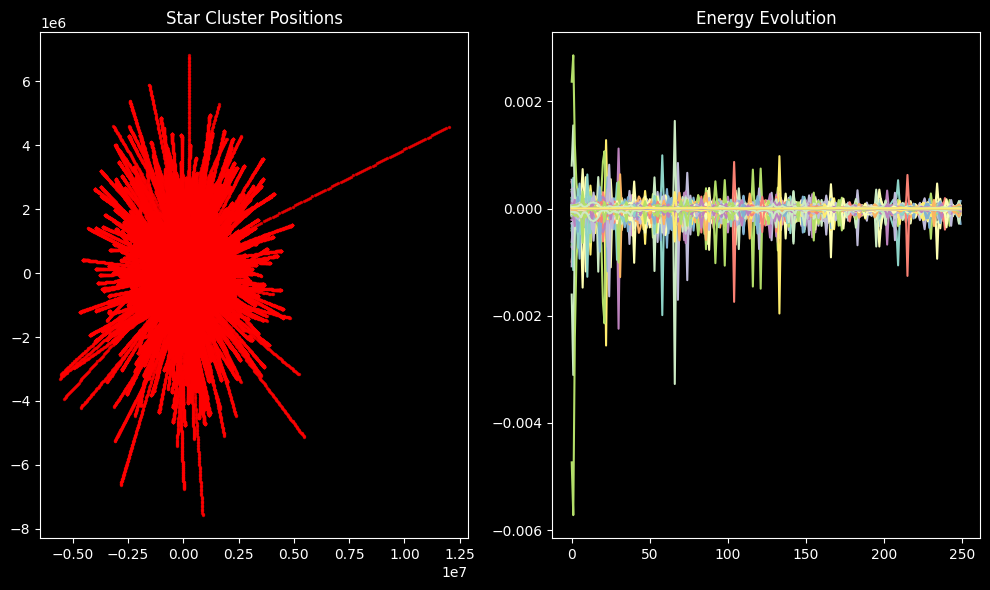

In [100]:
# Plot positions and potential energy
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.scatter(xPos,yPos,s=2,color='red',alpha=0.7)
plt.title('Star Cluster Positions')
plt.subplot(1,2,2)
plt.plot(potentialTotal,label='Total Potential Energy')
plt.plot(ke,label='Kinetic Energy')
plt.title('Energy Evolution')
plt.tight_layout()
plt.show()

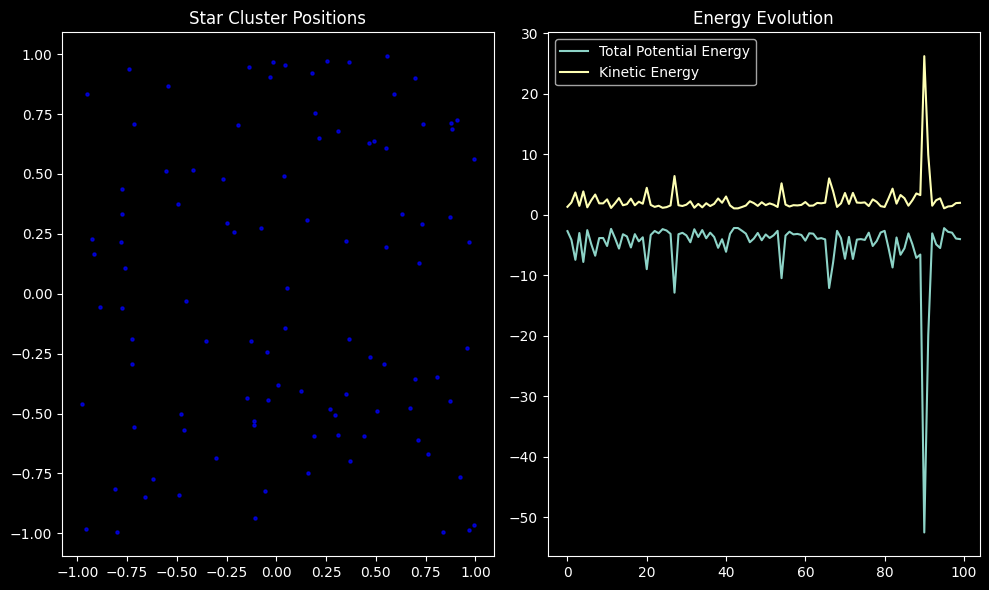

In [101]:
# Simple One - Just For Example
def simulate_star_cluster(num_stars, dark_matter_factor):
    # Generate random positions for stars
    x_positions = np.random.uniform(-1, 1, num_stars)
    y_positions = np.random.uniform(-1, 1, num_stars)
    # Calculate gravitational potential energy
    gravitational_potential = -1 / np.sqrt(x_positions**2 + y_positions**2)
    # Dark matter contribution (additional mass)
    dark_matter_potential = dark_matter_factor * gravitational_potential
    # Total potential energy
    total_potential = gravitational_potential + dark_matter_potential
    # Kinetic energy (set to maintain virial theorem)
    kinetic_energy = -0.5 * total_potential
    return x_positions, y_positions, total_potential, kinetic_energy
# Set parameters
num_stars = 100
dark_matter_factor = 2.0
# Simulate star cluster
x_positions, y_positions, total_potential, kinetic_energy = simulate_star_cluster(num_stars, dark_matter_factor)
# Plot positions and potential energy
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(x_positions, y_positions, s=5, color='blue', alpha=0.7)
plt.title('Star Cluster Positions')
plt.subplot(1, 2, 2)
plt.plot(total_potential, label='Total Potential Energy')
plt.plot(kinetic_energy, label='Kinetic Energy')
plt.title('Energy Evolution')
plt.legend()
plt.tight_layout()
plt.show()